In [1]:
import re
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk, spacy
from nltk.corpus import stopwords
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!wget -c https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip /content/drive/MyDrive/NLP_LAB/

--2024-02-16 08:09:58--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-02-16 08:12:37 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

/content/drive/MyDrive/NLP_LAB/: Scheme missing.
FINISHED --2024-02-16 08:12:37--
Total wall clock time: 2m 39s
Downloaded: 1 files, 822M in 2m 39s (5.18 MB/s)


In [5]:
!unzip /content/drive/MyDrive/NLP_LAB/glove.6B.zip -d /content/drive/MyDrive/NLP_LAB/

Archive:  /content/drive/MyDrive/NLP_LAB/glove.6B.zip
replace /content/drive/MyDrive/NLP_LAB/glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/NLP_LAB/glove.6B.50d.txt  
replace /content/drive/MyDrive/NLP_LAB/glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/NLP_LAB/glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/drive/MyDrive/NLP_LAB/glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [3]:
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 200
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 50
GLOVE_DIR = "/content/drive/MyDrive/NLP_LAB/glove.6B.50d.txt"

In [6]:

import pandas as pd
import nltk,spacy
import re, gensim
re = 30 # (1)18 (2) 20

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [9]:
train = pd.read_csv('/content/drive/MyDrive/NLP_LAB/train.csv')

In [10]:
labels = ['toxic','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = train[labels].values
comments_train = train['comment_text']
comments_train = list(comments_train)

In [11]:
def clean_text(text, remove_stopwords = True):
  output = ""
  text = str(text).replace("\n", "")
  text = re.sub(r'[^\w\s]','',text).lower()
  if remove_stopwords:
    text = text.split(" ")
    for word in text:
      if word not in stopwords.words("english"):
        output = output + " " + word
  else:
    output = text
  return str(output.strip())[1:-3].replace("  "," ")

In [15]:
import re

def clean_text(text, remove_stopwords=False):
    output = ""

    # Convert to string if text is not already a string
    text = str(text)

    # Remove newline characters
    text = text.replace("\n", "")

    # Convert to lowercase and remove non-alphanumeric characters
    text = re.sub(r'[^\w\s]', '', text).lower()

    if remove_stopwords:
        text = text.split(" ")
        # Additional processing for removing stopwords if needed

    return text


In [16]:
#pre-processed clean text
texts=[]
for line in tqdm_notebook(comments_train, total=159571):
  texts.append(clean_text(line))

  0%|          | 0/159571 [00:00<?, ?it/s]

In [17]:
print("Example :" ,texts[1],y[1])

Example : daww he matches this background colour im seemingly stuck with thanks  talk 2151 january 11 2016 utc [0 0 0 0 0 0]


In [18]:
#word Tokenization

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index) )

Vocabulary size: 306326


In [19]:
#pad the text tO MAKE EVERY TEXT OF EQUAL LENGTH

data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (159571, 200)
Shape of label tensor: (159571, 6)


In [21]:

#shuffle the data,so index cannot affect prediction
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]



In [22]:
#print vectorized data

print('Tokenized sentences:\n',data[10])
print('One hot label \n',labels[10])

Tokenized sentences:
 [    1    75   197     7   311     3     5   482    23     9     7    72
   568    15     1 15672   113     4     7   344    67    34   354    57
   482     8  1116    12    57 43143    12   577   197 41587   158  6327
   158  1092    38   788   334 30610   859  2718  1781   318     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     

In [29]:
from tkinter.constants import N
#Create Glove Embeddings
embeddings_index = {} #dictionary to store words as keys and vectors as value
f = open(GLOVE_DIR)
print('Loading Glove From:',GLOVE_DIR,'....', end='')
for line in f:
  values = line.split()
  word = values[0] #store word from 0th position in variabele
  embeddings_index[word] = np.asarray(values[1:], dtype ='float32') #store vector of particular word in dictionar
f.close()
print("Done.\n Procedding with embeddings matrix....", end="")

embeddings_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))#CREATE A MATRIX OF SIZE LENGTH OF VOCAB
for word, i in word_index.items(): #for every word in vocab select word and itsbindex
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embeddings_matrix[i] = embedding_vector #if embedding vector not emplty,save vector to matrix
print("completed")

Loading Glove From: /content/drive/MyDrive/NLP_LAB/glove.6B.50d.txt ....Done.
 Procedding with embeddings matrix....completed


In [31]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype='int32')#crete sequence input of shape maximum sequence
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights = [embeddings_matrix],
                            input_length = MAX_SEQUENCE_LENGTH,
                            trainable = False,
                            name = 'embeddings') #Create embeddings of size len of vocab and embedding dimension
embedded_sequences = embedding_layer(sequence_input)#insert sequence to embedding layer
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences) #create single layer lstm with 60 activation
x = GlobalMaxPool1D()(x)#MAXPOOL LAYER
x = Dropout(0.1)(x)#dropout 10 % actiavtion units
x = Dense(50,activation="relu")(x)#consolidation of previous layer
x = Dropout(0.1)(x)#dropout
preds = Dense(6, activation = "sigmoid")(x)#Output with six labels


In [33]:
model = Model(sequence_input, preds)
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [36]:
# Your existing code to tokenize and pad the text data (already provided)

# Your existing code to shuffle the data (already provided)

# X_train (input data) is your padded sequences (data)
x_train = data

# y_train (output data) is your labels (y)
y_train = y

# Print shapes to verify
print('Shape of X_train (input data):', x_train.shape)
print('Shape of y_train (output data):', y_train.shape)


Shape of X_train (input data): (159571, 200)
Shape of y_train (output data): (159571, 6)


In [40]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of x_val:', x_val.shape)
print('Shape of y_val:', y_val.shape)

# Training progress
history = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))




Shape of x_train: (127656, 200)
Shape of y_train: (127656, 6)
Shape of x_val: (31915, 200)
Shape of y_val: (31915, 6)
Epoch 1/2
3990/3990 [==============================] - 466s 116ms/step - loss: 0.1464 - accuracy: 0.9063 - val_loss: 0.1419 - val_accuracy: 0.9941
Epoch 2/2
3990/3990 [==============================] - 431s 108ms/step - loss: 0.1429 - accuracy: 0.9927 - val_loss: 0.1435 - val_accuracy: 0.9941


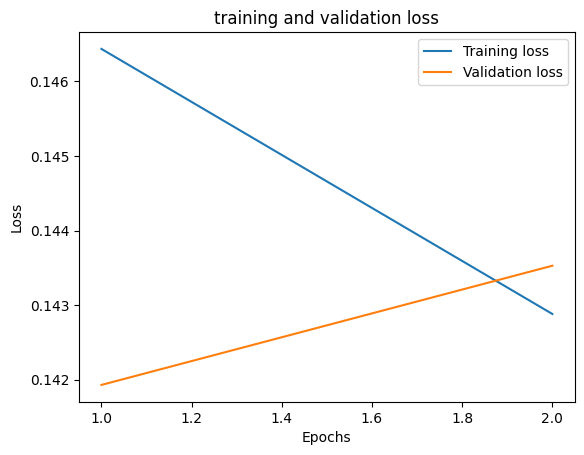

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();
